In [8]:
# Import necessary packages

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import box, MultiPolygon, Polygon, mapping
import geopandas as gpd
import rasterio as rio
import rioxarray as rxr
import earthpy as et

In [9]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 
                      'earth-analytics', 
                      'crop-performance-forecasting-project'))

In [2]:
# Test connection to gridded climate data

soil_url = 'https://s3-ap-southeast-2.amazonaws.com/silo-open-data/daily/max_temp/2018/20180103.max_temp.tif'

silo_tif = rxr.open_rasterio(soil_url,
                             masked=True).squeeze()

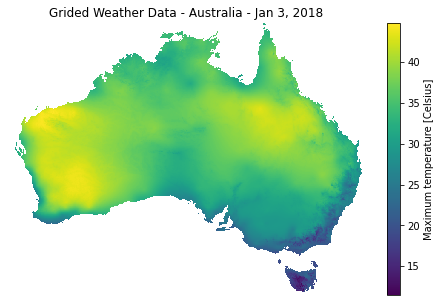

In [3]:
# Plot newly classified and masked raster

f, ax = plt.subplots(figsize = (8,5))

im = silo_tif.plot.imshow()

ax.set(title = "Grided Weather Data - Australia - Jan 3, 2018")

ax.set_axis_off()
plt.show()

In [5]:
ts = pd.date_range(start = '2015-10-01', end = '2021-03-31', freq='1D')

ts

DatetimeIndex(['2015-10-01', '2015-10-02', '2015-10-03', '2015-10-04',
               '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08',
               '2015-10-09', '2015-10-10',
               ...
               '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25',
               '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', length=2009, freq='D')

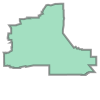

In [15]:
merredin = gpd.read_file('data/merredin-shape/merredin-shape.shp')

merredin.geometry[0]

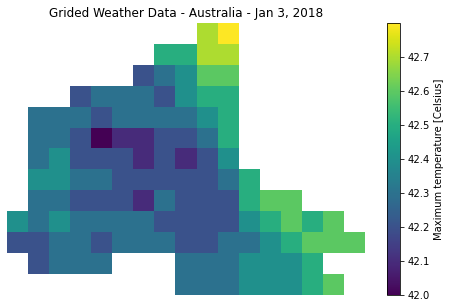

In [13]:
merredin_mxtemp = silo_tif.rio.clip(merredin.geometry)

f, ax = plt.subplots(figsize = (8,5))

im = merredin_mxtemp.plot.imshow()

ax.set(title = "Grided Weather Data - Australia - Jan 3, 2018")

ax.set_axis_off()
plt.show()